### Import necessary libraries
This block imports essential libraries like pandas for data handling, matplotlib/seaborn for visualization, and numpy for numerical operations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load the dataset
Read the CSV file containing height and weight data. Drop the unnecessary 'Index' column.

In [2]:
df=pd.read_csv('height_weight_data.csv')
df.drop('Index',axis=1,inplace = True)

### Preview the dataset
Display the first few rows to understand the structure of the data.

In [3]:
df.head()

,Height (Inches),Weight (Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


###  Visualize the relationship
Plot a scatter graph to visualize the relationship between weight and height.

Text(0, 0.5, 'Height')

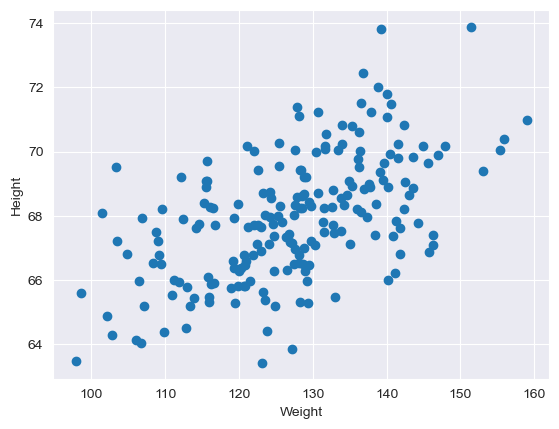

In [4]:
##scatter plot
plt.scatter(df[' Weight (Pounds)'],df[' Height (Inches)'])
plt.xlabel('Weight')
plt.ylabel("Height")

### Check correlation
Calculate the correlation between the variables.

In [5]:
##Correlation
df.corr()

,Height (Inches),Weight (Pounds)
Height (Inches),1.000000,0.556865
Weight (Pounds),0.556865,1.000000


###  Seaborn Pairplot
Use seaborn to visualize pairwise relationships.

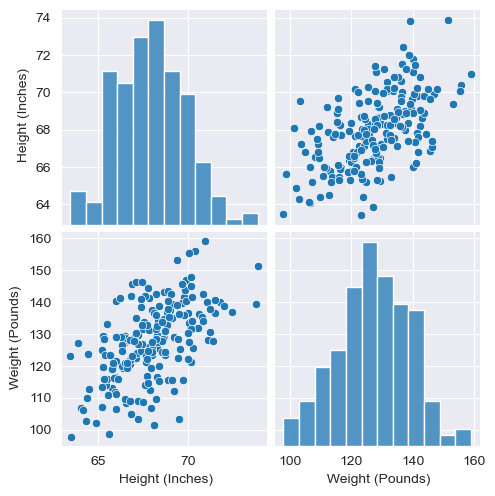

In [6]:
## Seaborn for Visualization
import seaborn as sns
sns.pairplot(df)
##The graph shows simple linear regression

###  Preview the dataset
Display the first few rows to understand the structure of the data.

In [7]:
##Independent and Dependent features
x=df[[' Weight (Pounds)']] ##independent features should be dataframe or 2 dimensional array
y=df[' Height (Inches)'] ##this variable can be in series or id array

x.head()
y.head()


0    65.78
1    71.52
2    69.40
3    68.22
4    67.79
Name:  Height (Inches), dtype: float64

In [8]:
np.array(y).shape

(200,)

###  Split the data
Split the dataset into training and testing sets using sklearn.

In [9]:
##Train Test Split
from sklearn.model_selection import train_test_split


###  Split the data
Split the dataset into training and testing sets using sklearn.

In [10]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
x_train.shape

(150, 1)

###  Feature scaling
Standardize the input features to improve model performance.

In [12]:
##Standardization
from sklearn.preprocessing import StandardScaler

###  Feature scaling
Standardize the input features to improve model performance.

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [14]:
x_test = scaler.transform(x_test)

In [15]:
x_test

array([[ 0.38762047],
       [ 1.07381263],
       [-1.99731571],
       [ 0.97172063],
       [ 1.09389631],
       [ 0.11565406],
       [-0.20401107],
       [-0.38141685],
       [ 1.01523525],
       [ 0.13322728],
       [ 1.2805071 ],
       [-1.50610254],
       [ 0.00603068],
       [-0.96635382],
       [ 0.05875032],
       [-0.69271378],
       [ 2.40435597],
       [-0.53120757],
       [ 2.36084135],
       [-1.97806885],
       [-1.69940789],
       [ 0.19515194],
       [ 0.30059122],
       [-1.25756708],
       [-1.46928247],
       [ 0.13071682],
       [ 0.16167915],
       [ 0.46711834],
       [-0.32451311],
       [-0.97137474],
       [-0.54375987],
       [ 0.89808049],
       [ 1.73406338],
       [-0.5747222 ],
       [-0.14794415],
       [-1.05505671],
       [ 0.73573747],
       [-0.02911575],
       [ 0.09557039],
       [ 0.95665787],
       [-0.38894822],
       [ 0.09473357],
       [ 0.34996358],
       [ 1.22862428],
       [ 0.09222311],
       [-0

###  Train Linear Regression
Fit a linear regression model using the training data.

In [16]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression

In [17]:
regression = LinearRegression(n_jobs = -1)

In [18]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [19]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept: ",regression.intercept_) ## which cuts y axis in y=mx + c

Coefficient or slope:  [1.1844199]
Intercept:  67.8268


###  Visualize the relationship
Plot a scatter graph to visualize the relationship between weight and height.

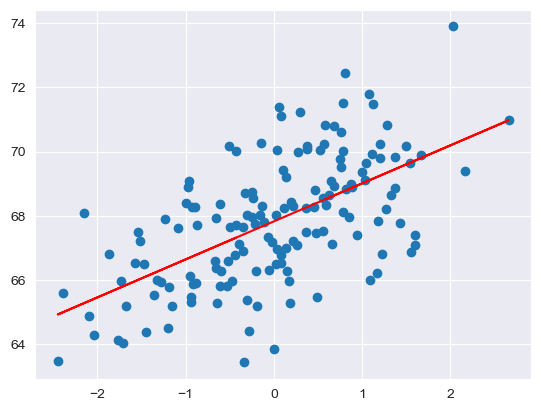

In [20]:
##plot training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train),color =  'red')

###  Make predictions
Use the trained model to predict height from the test weight data.

In [21]:
##prediction for test data
y_pred=regression.predict(x_test)

###  Evaluate the model
Use metrics like MAE, MSE, and RMSE to evaluate the performance of the model.

In [22]:
##Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.8764172557433714
1.3427929389639999
1.6960003702073214


###  Evaluate the model
Use metrics like MAE, MSE, and RMSE to evaluate the performance of the model.

In [24]:
from sklearn.metrics import r2_score

In [25]:
score=r2_score(y_test,y_pred)
print(score)

0.05188474065459758


In [26]:
#display adjusted R-Squared
1 - (1-score)*(len(y_test) - 1)/(len(y_test)-x_test.shape[1] - 1)


0.03213233941823501

In [27]:
##OLS Linear regression
import statsmodels.api as sm

###  Make predictions
Use the trained model to predict height from the test weight data.

In [28]:
model = sm.OLS(y_train,x_train).fit()
prediction = model.predict(x_test)
print(prediction)

[ 0.4591054   1.27184505 -2.36566046  1.15092524  1.29563255  0.13698297
 -0.24163477 -0.4517577   1.20246483  0.15779704  1.51665809 -1.78385781
  0.00714286 -1.1445687   0.06958505 -0.82046398  2.84776705 -0.62917282
  2.79622746 -2.34286411 -2.01281252  0.23114184  0.35602622 -1.48948747
 -1.74024739  0.1548236   0.191496    0.55326426 -0.38435978 -1.15051557
 -0.64404001  1.0637044   2.05385917 -0.68071241 -0.17522799 -1.24963016
  0.8714221  -0.03448527  0.11319547  1.13308462 -0.46067801  0.11220433
  0.41450383  1.45520704  0.10923089 -0.62719053 -1.31603694 -0.31002383
  0.04084182  1.36005703]


In [29]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Height (Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                            0.04541
Date:                Mon, 07 Jul 2025   Prob (F-statistic):                       0.832
Time:                        02:40:23   Log-Likelihood:                         -845.43
No. Observations:                 150   AIC:                                      1693.
Df Residuals:                     149   BIC:                                      1696.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### We are predicting height(inches) using weight(pounds)
Enter you weight to predict height

In [30]:
##Prediction of new data
regression.predict([[110]])

array([198.11298855])